# Draw the dynamic annotations charts for each video clip

Read the dynamic annotations, and plot the dynamic valence-arousal trajectory and distribution chart for each video clip using matplotlib and seaborn.

Input: 
- Dynamic annotations folder `REFED-dataset/annotations/`.
- Video info file `REFED-dataset/video_info.csv`.

In [ ]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.gridspec import *
from load_REFED import load_label

In [2]:
path_annotation = './REFED-dataset/annotations'
path_video_info = './REFED-dataset/Video_info.csv'

In [ ]:
# Read annotations and video info.
label_all = load_label(path_annotation)
video_info = pd.read_csv(path_video_info)

In [4]:
video_info

,video_id,Source,Description,ClipLength,ExtractedSeconds,TargetedEmotion
0,1,Bilibili,How Computer Chips Work,0:02:16,134,MVMA (Neutral)
1,2,SCEFD,Changjiang Qihao,0:02:19,137,LVLA (Sad)
2,3,SCEFD,Inner Senses,0:01:32,90,LVHA (Fear)
3,4,CPED,King of Destruction,0:01:21,79,HVHA (Happy)
4,5,CPED,7 Strangest Places in the World,0:02:17,135,HVLA (Relax)
5,6,PED,Gangs of New York,0:01:35,93,LVLA (Sad)
6,7,CPED,Iron Fist of Shame,0:02:04,122,HVHA (Happy)
7,8,CPED,Food those tantalizing moments,0:01:49,107,HVLA (Relax)
8,9,PED,The Pianist,0:01:12,70,LVHA (Fear)
9,10,SCEFD,Raise the Red Lantern,0:01:02,60,MVMA (Neutral)


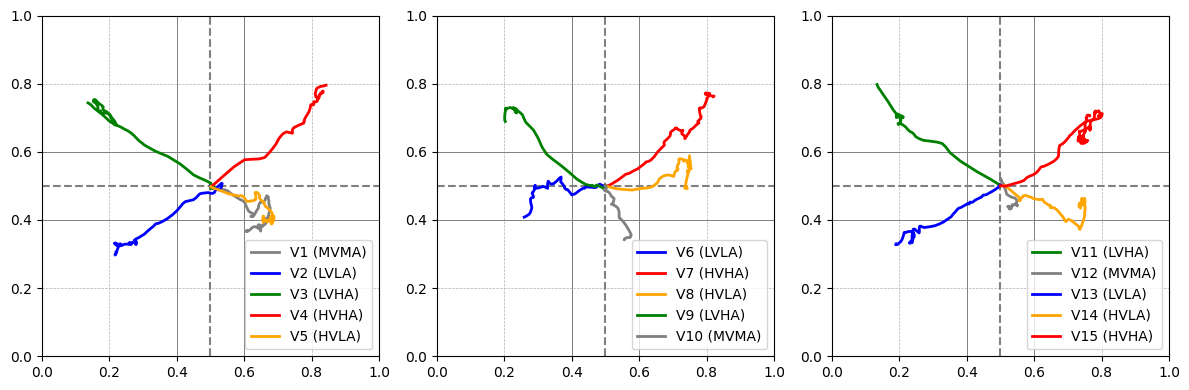

In [6]:
# Compute mean Valence and Arousal for each video across all subjects.

mean_Valence = [np.mean([label_all['s%d'%si]['v%d'%vi]['Valence'] for si in range(1, 33)], axis=0)/256 for vi in range(1, 16)]
mean_Arousal = [np.mean([label_all['s%d'%si]['v%d'%vi]['Arousal'] for si in range(1, 33)], axis=0)/256 for vi in range(1, 16)]


# Video labels: 0 3 2 1 4   3 1 4 2 0   2 0 3 4 1
# 0 neutral; 1 happy; 2 fearful; 3 sad; 4 relaxed
video_label = [0, 3, 2, 1, 4, 3, 1, 4, 2, 0, 2, 0, 3, 4, 1]
color = ['gray', 'red', 'green', 'blue', 'orange']
# str_e = ['Neural', 'Happy', 'Fear', 'Sad', 'Relax']
str_e = ['MVMA', 'HVHA', 'LVHA', 'LVLA', 'HVLA']


# Moving average
def moving_average(data, window_size):
    return np.convolve(data, np.ones(window_size)/window_size, mode='valid')


plt.figure(figsize=(12,4))
for i in range(15):
    if i%5==0:
        plt.subplot(1,3,i//5+1)
        plt.hlines(0.5, 0, 1, 'gray', linestyles='dashed', alpha=1,)
        plt.vlines(0.5, 0, 1, 'gray', linestyles='dashed', alpha=1)
        plt.hlines([0.4, 0.6], 0, 256, 'gray', linestyles='-', alpha=1, linewidth=0.7)
        plt.vlines([0.4, 0.6], 0, 256, 'gray', linestyles='-', alpha=1, linewidth=0.7)
        plt.xlim(0,1)
        plt.ylim(0,1)
    plt.plot(
        moving_average(mean_Valence[i], 3), # mean_Valence[i],
        moving_average(mean_Arousal[i], 3), # mean_Arousal[i],
        color=color[video_label[i]],
        linewidth=2, 
        label='V%d (%s)'%(i+1, str_e[video_label[i]])
        )
    if (i+1)%5==0:
        plt.legend(loc='lower right', fontsize=10)

    plt.grid(linewidth=0.5, linestyle='--')

plt.tight_layout()
# plt.savefig('mean_dynamic.pdf', dpi=300)
plt.show()

In [ ]:
# Get all Valence and Arousal data for each video across all subjects.
all_Valence = [np.array([label_all['s%d'%si]['v%d'%vi]['Valence'] for si in range(1, 33)])/256 for vi in range(1, 16)]
all_Arousal = [np.array([label_all['s%d'%si]['v%d'%vi]['Arousal'] for si in range(1, 33)])/256 for vi in range(1, 16)]

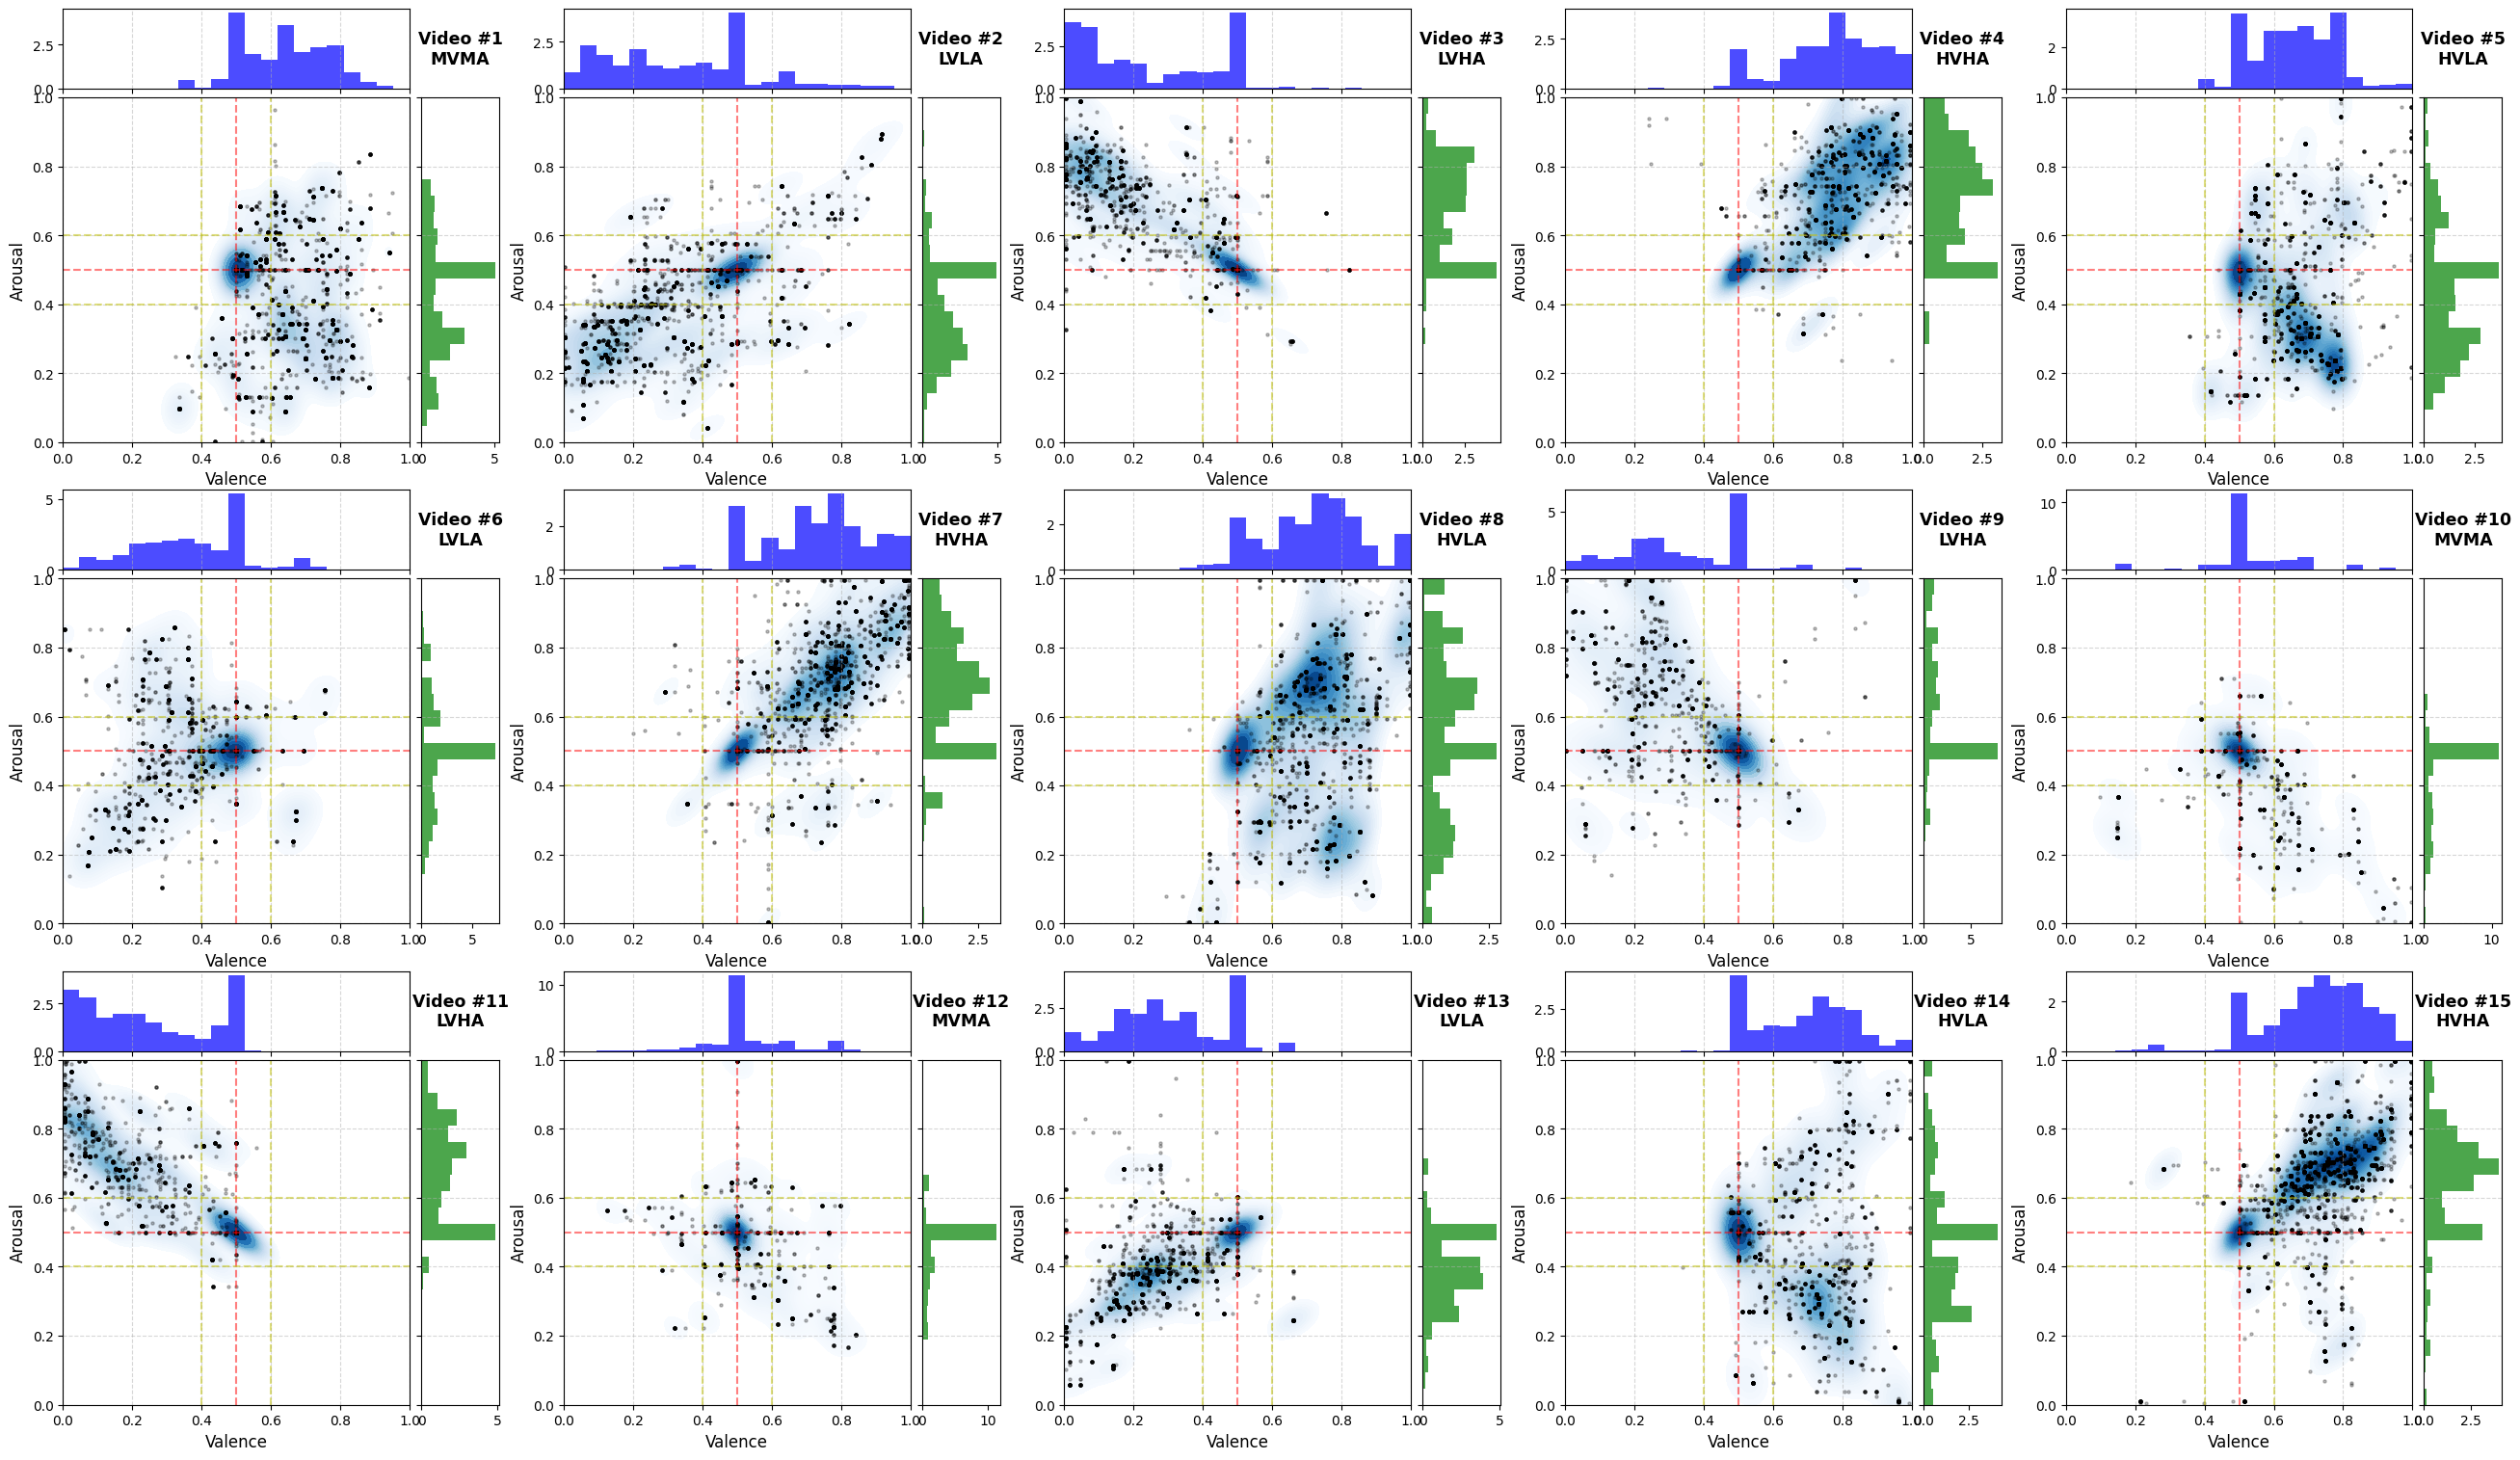

In [8]:
# Plot Valence-Arousal distribution for each video.

# Create a chart layout
fig = plt.figure(figsize=(5.2*5, 5*3))
gs15 = GridSpec(3, 5, figure=fig)#, hspace=1, wspace=1)
lengrid = 5

for i in range(15):

    gs = GridSpecFromSubplotSpec(5, 5, subplot_spec=gs15[i])#, hspace=1, wspace=1)

    x = all_Valence[i].reshape(-1)
    y = all_Arousal[i].reshape(-1)

    # Main scatter plot and density
    main_ax = fig.add_subplot(gs[1:lengrid, 0:lengrid-1])
    main_ax.grid(linestyle='--', alpha=0.5)
    kde = sns.kdeplot(x=x, y=y, fill=True, cmap='Blues', ax=main_ax, levels=30)
    main_ax.scatter(x, y, color='black', s=5, alpha=0.25)
    main_ax.set_xlabel('Valence', fontsize=12)
    main_ax.set_ylabel('Arousal', fontsize=12)
    main_ax.hlines(0.5, 0, 1.0, 'r', linestyles='dashed', alpha=0.5)
    main_ax.vlines(0.5, 0, 1.0, 'r', linestyles='dashed', alpha=0.5)
    main_ax.hlines([0.4, 0.6], 0, 1, 'y', linestyles='dashed', alpha=0.5)
    main_ax.vlines([0.4, 0.6], 0, 1, 'y', linestyles='dashed', alpha=0.5)
    plt.xlim(0,1)
    plt.ylim(0,1)


    # x-axis histogram
    top_ax = fig.add_subplot(gs[0, 0:lengrid-1], sharex=main_ax)
    top_ax.hist(x, bins=21, color='blue', alpha=0.7, density=True, range=(0,1))
    top_ax.tick_params(labelbottom=False)
    top_ax.grid(linestyle='--', alpha=0.5, axis='x')

    # y-axis histogram
    right_ax = fig.add_subplot(gs[1:lengrid, lengrid-1], sharey=main_ax)
    right_ax.hist(y, bins=21, orientation='horizontal', color='green', alpha=0.7, density=True, range=(0,1))
    right_ax.tick_params(labelleft=False)
    right_ax.grid(linestyle='--', alpha=0.5, axis='y')

    # text label
    text_ax = fig.add_subplot(gs[0, lengrid-1])
    text_ax.axis('off')  # Hide Axis
    text_ax.text(0.5, 0.5, "Video #%d\n%s"%(i+1, str_e[video_label[i]]), ha='center', va='center', fontdict={'fontsize': 12.5, 'weight': 'bold'})

    plt.tight_layout(pad=0.1)

# Adjust the layout
plt.tight_layout(pad=0.15)
# plt.savefig('distribution.png', dpi=200)